C:\Users\User\AppData\Local\Temp\ipykernel_7668\4265701451.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('C:/Users/User/Desktop/10/rossmann-store-sales/train.csv')


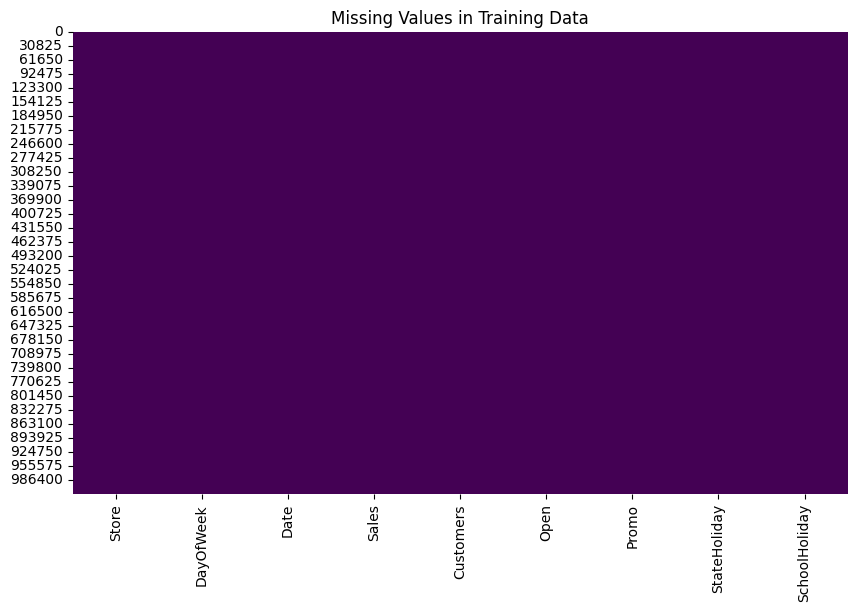

In [1]:
import pandas as pd

# Load the dataset
train_data = pd.read_csv('C:/Users/User/Desktop/10/rossmann-store-sales/train.csv')
test_data = pd.read_csv('C:/Users/User/Desktop/10/rossmann-store-sales/test.csv')

# Check for missing values
missing_train = train_data.isnull().sum()
missing_test = test_data.isnull().sum()

# Visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Training Data')
plt.show()


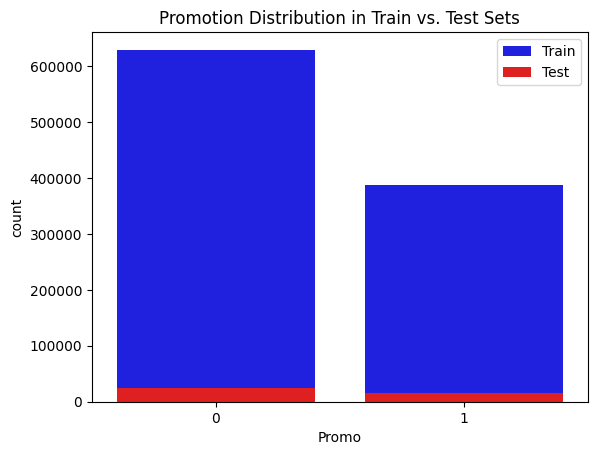

In [2]:
sns.countplot(x='Promo', data=train_data, color='blue', label='Train')
sns.countplot(x='Promo', data=test_data, color='red', label='Test')
plt.title('Promotion Distribution in Train vs. Test Sets')
plt.legend()
plt.show()


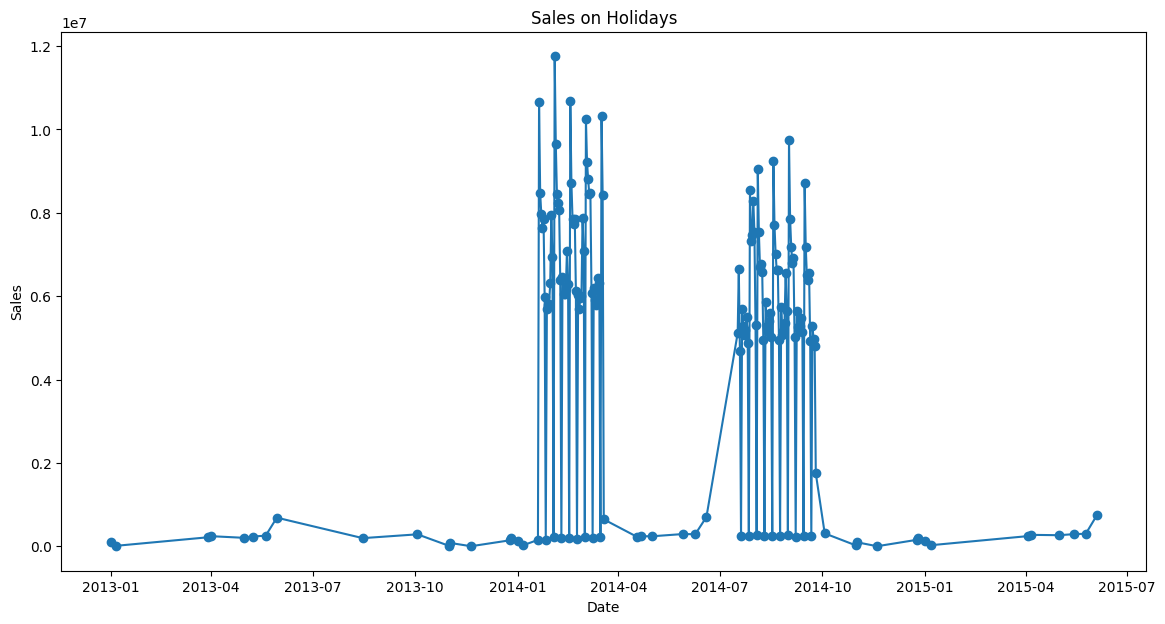

In [3]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data['Year'] = train_data['Date'].dt.year
train_data['Month'] = train_data['Date'].dt.month
train_data['Day'] = train_data['Date'].dt.day

# Aggregate sales around holidays
holiday_sales = train_data[train_data['StateHoliday'] != '0'].groupby('Date')['Sales'].sum().reset_index()

plt.figure(figsize=(14, 7))
plt.plot(holiday_sales['Date'], holiday_sales['Sales'], marker='o')
plt.title('Sales on Holidays')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


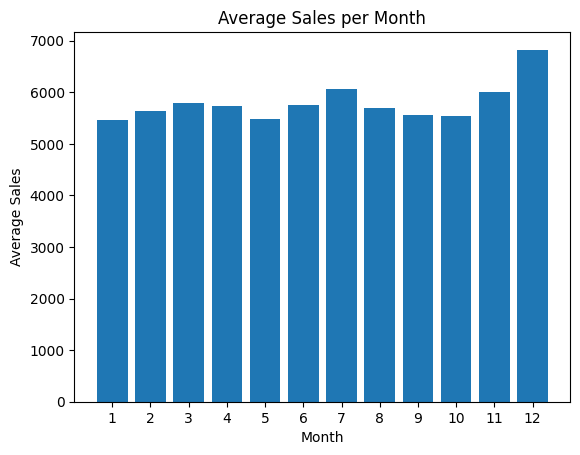

In [4]:
seasonal_sales = train_data.groupby('Month')['Sales'].mean().reset_index()

plt.bar(seasonal_sales['Month'], seasonal_sales['Sales'])
plt.title('Average Sales per Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(seasonal_sales['Month'])
plt.show()
